# Detecção de outlier com o Scikit Learn

In [1]:
import seaborn as sns 
import pandas as pd 


In [5]:
titanic = sns.load_dataset('titanic')

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


### Primeiro vamos achar os valores extremos na coluna idade. Para decidir qual método de descoberta de outliers devemos usar, devemos plotar o histograma da variável e examinar sua distribuição.

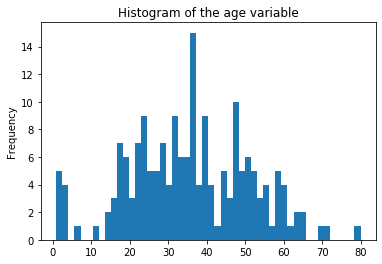

In [6]:
titanic = titanic.copy()
titanic = titanic.dropna()
titanic['age'].plot.hist(
  bins = 50,
  title = "Histogram of the age variable"
)

# Z - score
- Como parece com um distribuição gaussiana, então vamos usar o z-score
- Z-score é a diferença entre o valor e a média da amostra expressa com o número de desvio padrão.
- Se o Z-score z for menor que 2,5 ou maior que 2,5, os valores estará nos 5% dos valores menores ou maiores(2,5% dos valores nas duas extremidade da distribuição

In [8]:
from scipy.stats import zscore
titanic['age_zscore'] = zscore(titanic['age'])
titanic['is_outlier'] = titanic['age_zscore'].apply(lambda x: x<=-2.5 or x>=2.5)

titanic[titanic['is_outlier']]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_zscore,is_outlier
630,1,1,male,80.0,0,0,30.0,S,First,man,True,A,Southampton,yes,True,2.83948,True


#### Outra maneira de encontrar os outliers é o DBSCAN, que usa clustering. Neste método, calculamos a distância entre pontos (a distância euclidiana ou alguma outra distância) e procuramos pontos que estão longe dos outros.

####  As an example, we will select the age and fare from the Titanic dataset and look for the outliers in the data frame.

#### First, we are going to plot the data frame and check if there are some values which may be considered to be outliers.



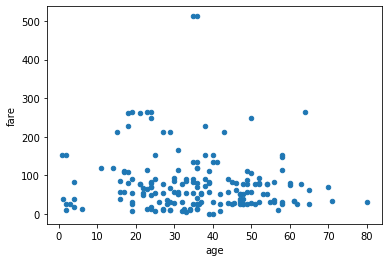

In [9]:
ageAndFare = titanic[["age", "fare"]]

ageAndFare.plot.scatter(x = "age", y = "fare")

### Vemos dois pontos com um grande valor do atributo "tarifa".

### Também vemos que ambas as variáveis têm escalas diferentes. Por esse motivo, a distância seria dominada pela variável tarifária. Como não queremos isso, precisamos normalizar as variáveis.

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [16]:
ageAndFare = scaler.fit_transform(ageAndFare)
#print(ageAndFare)

In [19]:
ageAndFare =pd.DataFrame(ageAndFare, columns=['age','fare'])
ageAndFare.head()

,age,fare
0,0.468892,0.139136
1,0.430956,0.103644
2,0.671219,0.101229
3,0.038948,0.032596
4,0.721801,0.051822


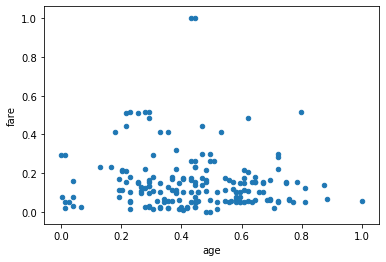

In [20]:
ageAndFare.plot.scatter(x='age', y='fare')

### O DBSCAN vai atribuir pontos aos clusters e retornar os rótulos dos clusters. Se não puder atribuir o valor a nenhum cluster (por ser um outlier), ele retornará -1. Neste exemplo, ele também pode retornar um cluster que contém apenas dois pontos, mas, para fins de demonstração, eu quero -1, então defino o número mínimo de amostras em um cluster como 3.

In [27]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps=0.5, metric='euclidean', min_samples=3, n_jobs=-1)
clusters = outlier_detection.fit_predict(ageAndFare)
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

#### Como esperado nos encontramos 2 outliers

#### Agora vamos verificar se os pontos marcados como outliers são os esperados

#### 1 - mesclar a saída ao quadro de dados e imprimir a saída ou

#### 2 - we can plot the dataset and use the cluster identifier to color the points.

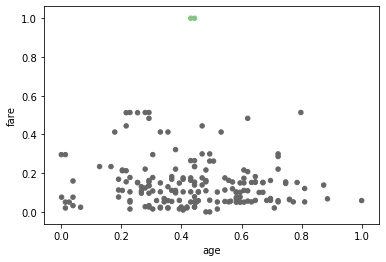

In [28]:
from matplotlib import cm
cmap = cm.get_cmap('Accent')
ageAndFare.plot.scatter(
  x = "age",
  y = "fare",
  c = clusters,
  cmap = cmap,
  colorbar = False
)